In [50]:
import pandas as pd 
from pandas import ExcelWriter
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)



In [21]:
data = pd.read_excel("owid-covid-data.xlsx") 
data.head

<bound method NDFrame.head of       iso_code       location        date  total_cases  new_cases  \
0          ABW          Aruba  2020-03-13            2          2   
1          ABW          Aruba  2020-03-20            4          2   
2          ABW          Aruba  2020-03-24           12          8   
3          ABW          Aruba  2020-03-25           17          5   
4          ABW          Aruba  2020-03-26           19          2   
...        ...            ...         ...          ...        ...   
16796      NaN  International  2020-02-28          705          0   
16797      NaN  International  2020-02-29          705          0   
16798      NaN  International  2020-03-01          705          0   
16799      NaN  International  2020-03-02          705          0   
16800      NaN  International  2020-03-10          696         -9   

       total_deaths  new_deaths  total_cases_per_million  \
0                 0           0                   18.733   
1                 0  

In [22]:
val=data.groupby(['location','date']).sum().reset_index()
val=val.loc[val['date'] == '2020-05-12']
val

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
123,Afghanistan,2020-05-12,4687,285,122,2,120.401,7.321,3.134,0.051,...,2.581,1.337,1803.987,0.0,597.029,9.59,0.000,0.000,37.746,0.500
188,Albania,2020-05-12,872,4,31,0,303.009,1.390,10.772,0.000,...,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,0.000,2.890
317,Algeria,2020-05-12,5891,168,507,5,134.341,3.831,11.562,0.114,...,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900
377,Andorra,2020-05-12,756,1,48,0,9784.508,12.942,621.239,0.000,...,0.000,0.000,0.000,0.0,109.135,7.97,29.000,37.800,0.000,0.000
429,Angola,2020-05-12,45,0,2,0,1.369,0.000,0.061,0.000,...,2.405,1.362,5819.495,0.0,276.045,3.94,0.000,0.000,26.664,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16525,Western Sahara,2020-05-12,6,0,0,0,10.045,0.000,0.000,0.000,...,0.000,1.380,0.000,0.0,0.000,0.00,0.000,0.000,0.000,0.000
16659,World,2020-05-12,4137193,70644,285760,3393,530.763,9.063,36.660,0.435,...,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705
16692,Yemen,2020-05-12,56,5,9,1,1.878,0.168,0.302,0.034,...,2.922,1.583,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700
16747,Zambia,2020-05-12,267,0,7,0,14.524,0.000,0.381,0.000,...,2.480,1.542,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000


In [23]:
casestracker=val[['location','date','gdp_per_capita','extreme_poverty',
                 'diabetes_prevalence','male_smokers','female_smokers','hospital_beds_per_100k','total_cases']]
casestracker


,location,date,gdp_per_capita,extreme_poverty,diabetes_prevalence,male_smokers,female_smokers,hospital_beds_per_100k,total_cases
123,Afghanistan,2020-05-12,1803.987,0.0,9.59,0.000,0.000,0.500,4687
188,Albania,2020-05-12,11803.431,1.1,10.08,51.200,7.100,2.890,872
317,Algeria,2020-05-12,13913.839,0.5,6.73,30.400,0.700,1.900,5891
377,Andorra,2020-05-12,0.000,0.0,7.97,37.800,29.000,0.000,756
429,Angola,2020-05-12,5819.495,0.0,3.94,0.000,0.000,0.000,45
...,...,...,...,...,...,...,...,...,...
16525,Western Sahara,2020-05-12,0.000,0.0,0.00,0.000,0.000,0.000,6
16659,World,2020-05-12,15469.207,10.0,8.51,34.635,6.434,2.705,4137193
16692,Yemen,2020-05-12,1479.147,18.8,5.35,29.200,7.600,0.700,56
16747,Zambia,2020-05-12,3689.251,57.5,3.94,24.700,3.100,2.000,267


In [24]:
WeatherData = pd.read_csv('weather.csv') 
WeatherData

,humidity,country_region,date,month,day,week,temp_max_mean_week,temp_min_mean_week,mean_week_humidity
0,0.86,Afghanistan_unknown,2020-01-23,1,1,1,43.337500,27.457500,0.727500
1,0.73,Afghanistan_unknown,2020-01-24,1,2,1,43.337500,27.457500,0.727500
2,0.67,Afghanistan_unknown,2020-01-25,1,3,1,43.337500,27.457500,0.727500
3,0.65,Afghanistan_unknown,2020-01-26,1,4,1,43.337500,27.457500,0.727500
4,0.50,Afghanistan_unknown,2020-01-27,1,5,2,44.470000,22.832857,0.537143
...,...,...,...,...,...,...,...,...,...
24398,0.56,Zambia_unknown,2020-04-16,4,85,13,81.911429,63.388571,0.612857
24399,0.62,Zambia_unknown,2020-04-17,4,86,13,81.911429,63.388571,0.612857
24400,0.65,Zambia_unknown,2020-04-18,4,87,13,81.911429,63.388571,0.612857
24401,0.69,Zambia_unknown,2020-04-19,4,88,13,81.911429,63.388571,0.612857


In [25]:
WeatherData=WeatherData.groupby(['country_region']).mean().reset_index()
WeatherData=WeatherData[['country_region','humidity','temp_max_mean_week','temp_min_mean_week','mean_week_humidity']]
WeatherData

,country_region,humidity,temp_max_mean_week,temp_min_mean_week,mean_week_humidity
0,Afghanistan_unknown,0.609438,56.291685,37.987191,0.609438
1,Albania_unknown,0.680787,60.163596,41.775169,0.680787
2,Algeria_unknown,0.190787,82.687416,55.558876,0.190787
3,Andorra_unknown,0.621011,57.586854,36.934944,0.621011
4,Antigua and Barbuda_unknown,0.755955,82.075618,74.505393,0.755955
...,...,...,...,...,...
269,Uruguay_unknown,0.700674,84.260225,61.593146,0.700674
270,Uzbekistan_unknown,0.521685,58.901011,38.708989,0.521685
271,Venezuela_unknown,0.702472,89.868764,69.576292,0.702472
272,Vietnam_unknown,0.922360,75.859663,58.222022,0.922360


In [26]:
WeatherData['country_region'] = WeatherData['country_region'].map(lambda x: x.lstrip('').rstrip('_unknown'))
WeatherData

,country_region,humidity,temp_max_mean_week,temp_min_mean_week,mean_week_humidity
0,Afghanista,0.609438,56.291685,37.987191,0.609438
1,Albania,0.680787,60.163596,41.775169,0.680787
2,Algeria,0.190787,82.687416,55.558876,0.190787
3,Andorra,0.621011,57.586854,36.934944,0.621011
4,Antigua and Barbuda,0.755955,82.075618,74.505393,0.755955
...,...,...,...,...,...
269,Uruguay,0.700674,84.260225,61.593146,0.700674
270,Uzbekista,0.521685,58.901011,38.708989,0.521685
271,Venezuela,0.702472,89.868764,69.576292,0.702472
272,Vietnam,0.922360,75.859663,58.222022,0.922360


In [34]:
merged=pd.merge(WeatherData, casestracker, how='left', left_on='country_region', right_on='location')
merged

,country_region,humidity,temp_max_mean_week,temp_min_mean_week,mean_week_humidity,location,date,gdp_per_capita,extreme_poverty,diabetes_prevalence,male_smokers,female_smokers,hospital_beds_per_100k,total_cases
0,Afghanista,0.609438,56.291685,37.987191,0.609438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,0.680787,60.163596,41.775169,0.680787,Albania,2020-05-12,11803.431,1.1,10.08,51.2,7.1,2.89,872.0
2,Algeria,0.190787,82.687416,55.558876,0.190787,Algeria,2020-05-12,13913.839,0.5,6.73,30.4,0.7,1.90,5891.0
3,Andorra,0.621011,57.586854,36.934944,0.621011,Andorra,2020-05-12,0.000,0.0,7.97,37.8,29.0,0.00,756.0
4,Antigua and Barbuda,0.755955,82.075618,74.505393,0.755955,Antigua and Barbuda,2020-05-12,21490.943,0.0,13.17,0.0,0.0,3.80,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,Uruguay,0.700674,84.260225,61.593146,0.700674,Uruguay,2020-05-12,20551.409,0.1,6.93,19.9,14.0,2.80,711.0
270,Uzbekista,0.521685,58.901011,38.708989,0.521685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,Venezuela,0.702472,89.868764,69.576292,0.702472,Venezuela,2020-05-12,16745.022,0.0,6.47,0.0,0.0,0.80,422.0
272,Vietnam,0.922360,75.859663,58.222022,0.922360,Vietnam,2020-05-12,6171.884,2.0,6.00,45.9,1.0,2.60,288.0


In [35]:
merged = merged.dropna()
merged


,country_region,humidity,temp_max_mean_week,temp_min_mean_week,mean_week_humidity,location,date,gdp_per_capita,extreme_poverty,diabetes_prevalence,male_smokers,female_smokers,hospital_beds_per_100k,total_cases
1,Albania,0.680787,60.163596,41.775169,0.680787,Albania,2020-05-12,11803.431,1.1,10.08,51.2,7.1,2.89,872.0
2,Algeria,0.190787,82.687416,55.558876,0.190787,Algeria,2020-05-12,13913.839,0.5,6.73,30.4,0.7,1.90,5891.0
3,Andorra,0.621011,57.586854,36.934944,0.621011,Andorra,2020-05-12,0.000,0.0,7.97,37.8,29.0,0.00,756.0
4,Antigua and Barbuda,0.755955,82.075618,74.505393,0.755955,Antigua and Barbuda,2020-05-12,21490.943,0.0,13.17,0.0,0.0,3.80,25.0
5,Argentina,0.479101,85.467753,58.863146,0.479101,Argentina,2020-05-12,18933.907,0.6,5.50,27.7,16.2,5.00,6021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,United Arab Emirates,0.559551,85.315843,63.289438,0.559551,United Arab Emirates,2020-05-12,67293.483,0.0,17.26,37.4,1.2,1.20,18878.0
269,Uruguay,0.700674,84.260225,61.593146,0.700674,Uruguay,2020-05-12,20551.409,0.1,6.93,19.9,14.0,2.80,711.0
271,Venezuela,0.702472,89.868764,69.576292,0.702472,Venezuela,2020-05-12,16745.022,0.0,6.47,0.0,0.0,0.80,422.0
272,Vietnam,0.922360,75.859663,58.222022,0.922360,Vietnam,2020-05-12,6171.884,2.0,6.00,45.9,1.0,2.60,288.0


In [36]:
merged=merged[['humidity','temp_max_mean_week','temp_min_mean_week','mean_week_humidity','gdp_per_capita','extreme_poverty',
               'diabetes_prevalence','male_smokers','female_smokers','hospital_beds_per_100k','total_cases']]
merged

,humidity,temp_max_mean_week,temp_min_mean_week,mean_week_humidity,gdp_per_capita,extreme_poverty,diabetes_prevalence,male_smokers,female_smokers,hospital_beds_per_100k,total_cases
1,0.680787,60.163596,41.775169,0.680787,11803.431,1.1,10.08,51.2,7.1,2.89,872.0
2,0.190787,82.687416,55.558876,0.190787,13913.839,0.5,6.73,30.4,0.7,1.90,5891.0
3,0.621011,57.586854,36.934944,0.621011,0.000,0.0,7.97,37.8,29.0,0.00,756.0
4,0.755955,82.075618,74.505393,0.755955,21490.943,0.0,13.17,0.0,0.0,3.80,25.0
5,0.479101,85.467753,58.863146,0.479101,18933.907,0.6,5.50,27.7,16.2,5.00,6021.0
...,...,...,...,...,...,...,...,...,...,...,...
263,0.559551,85.315843,63.289438,0.559551,67293.483,0.0,17.26,37.4,1.2,1.20,18878.0
269,0.700674,84.260225,61.593146,0.700674,20551.409,0.1,6.93,19.9,14.0,2.80,711.0
271,0.702472,89.868764,69.576292,0.702472,16745.022,0.0,6.47,0.0,0.0,0.80,422.0
272,0.922360,75.859663,58.222022,0.922360,6171.884,2.0,6.00,45.9,1.0,2.60,288.0


In [37]:
df = merged[(merged.T != 0).any()]
df

,humidity,temp_max_mean_week,temp_min_mean_week,mean_week_humidity,gdp_per_capita,extreme_poverty,diabetes_prevalence,male_smokers,female_smokers,hospital_beds_per_100k,total_cases
1,0.680787,60.163596,41.775169,0.680787,11803.431,1.1,10.08,51.2,7.1,2.89,872.0
2,0.190787,82.687416,55.558876,0.190787,13913.839,0.5,6.73,30.4,0.7,1.90,5891.0
3,0.621011,57.586854,36.934944,0.621011,0.000,0.0,7.97,37.8,29.0,0.00,756.0
4,0.755955,82.075618,74.505393,0.755955,21490.943,0.0,13.17,0.0,0.0,3.80,25.0
5,0.479101,85.467753,58.863146,0.479101,18933.907,0.6,5.50,27.7,16.2,5.00,6021.0
...,...,...,...,...,...,...,...,...,...,...,...
263,0.559551,85.315843,63.289438,0.559551,67293.483,0.0,17.26,37.4,1.2,1.20,18878.0
269,0.700674,84.260225,61.593146,0.700674,20551.409,0.1,6.93,19.9,14.0,2.80,711.0
271,0.702472,89.868764,69.576292,0.702472,16745.022,0.0,6.47,0.0,0.0,0.80,422.0
272,0.922360,75.859663,58.222022,0.922360,6171.884,2.0,6.00,45.9,1.0,2.60,288.0


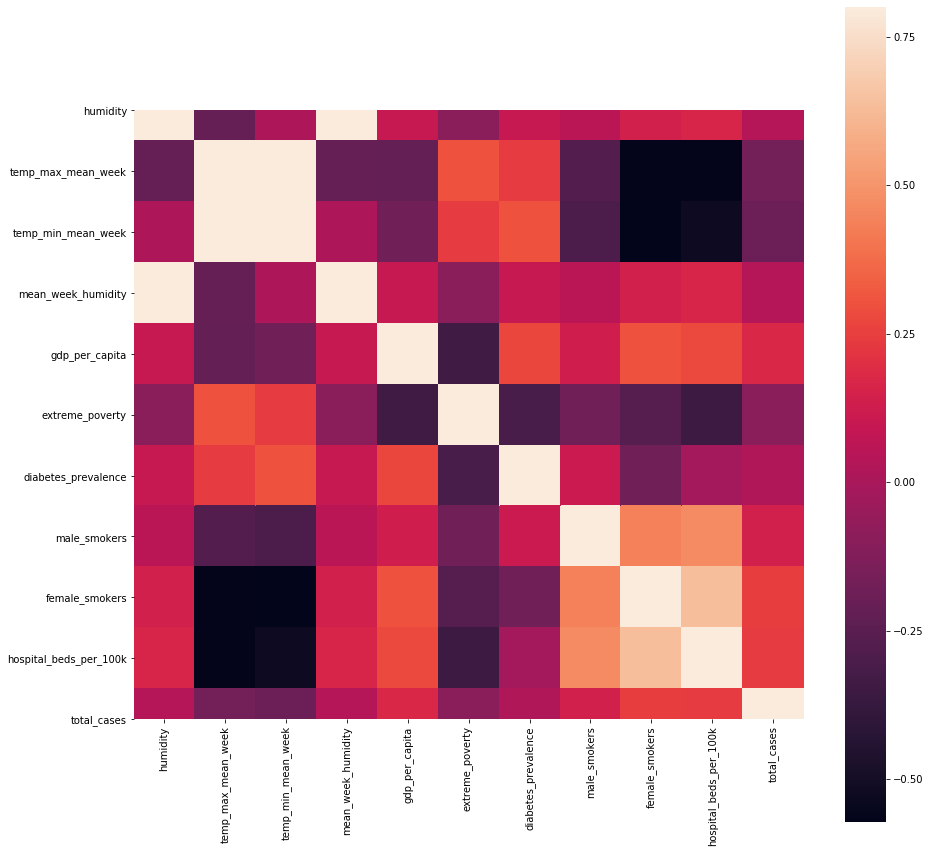

In [38]:
C_mat = df.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()


In [39]:
from sklearn.model_selection import train_test_split
labels_Y=df['total_cases']
labels_Y

1        872.0
2       5891.0
3        756.0
4         25.0
5       6021.0
        ...   
263    18878.0
269      711.0
271      422.0
272      288.0
273      267.0
Name: total_cases, Length: 106, dtype: float64

In [41]:
Data_X=df.drop(['total_cases'],axis=1)
Data_X

,humidity,temp_max_mean_week,temp_min_mean_week,mean_week_humidity,gdp_per_capita,extreme_poverty,diabetes_prevalence,male_smokers,female_smokers,hospital_beds_per_100k
1,0.680787,60.163596,41.775169,0.680787,11803.431,1.1,10.08,51.2,7.1,2.89
2,0.190787,82.687416,55.558876,0.190787,13913.839,0.5,6.73,30.4,0.7,1.90
3,0.621011,57.586854,36.934944,0.621011,0.000,0.0,7.97,37.8,29.0,0.00
4,0.755955,82.075618,74.505393,0.755955,21490.943,0.0,13.17,0.0,0.0,3.80
5,0.479101,85.467753,58.863146,0.479101,18933.907,0.6,5.50,27.7,16.2,5.00
...,...,...,...,...,...,...,...,...,...,...
263,0.559551,85.315843,63.289438,0.559551,67293.483,0.0,17.26,37.4,1.2,1.20
269,0.700674,84.260225,61.593146,0.700674,20551.409,0.1,6.93,19.9,14.0,2.80
271,0.702472,89.868764,69.576292,0.702472,16745.022,0.0,6.47,0.0,0.0,0.80
272,0.922360,75.859663,58.222022,0.922360,6171.884,2.0,6.00,45.9,1.0,2.60


In [42]:
>>> import numpy as np
>>> from sklearn.model_selection import train_test_split


In [43]:
X_train, X_test, y_train, y_test = train_test_split(
Data_X, labels_Y, test_size=0.33, random_state=20)


In [56]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               1408      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 33        
Total params: 6,625
Trainable params: 6,625
Non-trainable params: 0
_________________________________________________________________


In [61]:
NN_model.fit(X_train, y_train, epochs=500, batch_size=5, validation_split = 0.2)


Train on 56 samples, validate on 15 samples
Epoch 1/500
56/56 [==============================] - 0s 3ms/step - loss: 16908.8152 - mean_absolute_error: 16908.8152 - val_loss: 16315.7243 - val_mean_absolute_error: 16315.7243
Epoch 2/500
56/56 [==============================] - 0s 2ms/step - loss: 16894.1066 - mean_absolute_error: 16894.1066 - val_loss: 16313.9222 - val_mean_absolute_error: 16313.9222
Epoch 3/500
56/56 [==============================] - 0s 2ms/step - loss: 16898.9912 - mean_absolute_error: 16898.9912 - val_loss: 16313.4421 - val_mean_absolute_error: 16313.4421
Epoch 4/500
56/56 [==============================] - 0s 2ms/step - loss: 16887.8068 - mean_absolute_error: 16887.8068 - val_loss: 16306.1170 - val_mean_absolute_error: 16306.1170
Epoch 5/500
56/56 [==============================] - 0s 2ms/step - loss: 16897.4300 - mean_absolute_error: 16897.4300 - val_loss: 16304.7399 - val_mean_absolute_error: 16304.7399
Epoch 6/500
56/56 [==============================] - 0s 2ms/s

56/56 [==============================] - 0s 1ms/step - loss: 16909.7394 - mean_absolute_error: 16909.7394 - val_loss: 16309.1436 - val_mean_absolute_error: 16309.1436
Epoch 47/500
56/56 [==============================] - 0s 1ms/step - loss: 16888.5382 - mean_absolute_error: 16888.5382 - val_loss: 16315.5591 - val_mean_absolute_error: 16315.5591
Epoch 48/500
56/56 [==============================] - 0s 2ms/step - loss: 16900.9487 - mean_absolute_error: 16900.9487 - val_loss: 16320.8301 - val_mean_absolute_error: 16320.8301
Epoch 49/500
56/56 [==============================] - 0s 3ms/step - loss: 16891.3056 - mean_absolute_error: 16891.3056 - val_loss: 16306.0324 - val_mean_absolute_error: 16306.0324
Epoch 50/500
56/56 [==============================] - 0s 1ms/step - loss: 16903.1796 - mean_absolute_error: 16903.1796 - val_loss: 16302.3182 - val_mean_absolute_error: 16302.3182
Epoch 51/500
56/56 [==============================] - 0s 1ms/step - loss: 16902.1952 - mean_absolute_error: 16902

56/56 [==============================] - 0s 2ms/step - loss: 16903.3378 - mean_absolute_error: 16903.3378 - val_loss: 16313.1283 - val_mean_absolute_error: 16313.1283
Epoch 92/500
56/56 [==============================] - 0s 2ms/step - loss: 16889.8564 - mean_absolute_error: 16889.8564 - val_loss: 16312.2152 - val_mean_absolute_error: 16312.2152
Epoch 93/500
56/56 [==============================] - 0s 2ms/step - loss: 16902.0968 - mean_absolute_error: 16902.0968 - val_loss: 16305.7025 - val_mean_absolute_error: 16305.7025
Epoch 94/500
56/56 [==============================] - 0s 1ms/step - loss: 16898.4398 - mean_absolute_error: 16898.4398 - val_loss: 16309.6800 - val_mean_absolute_error: 16309.6800
Epoch 95/500
56/56 [==============================] - 0s 1ms/step - loss: 16895.7357 - mean_absolute_error: 16895.7357 - val_loss: 16307.6493 - val_mean_absolute_error: 16307.6493
Epoch 96/500
56/56 [==============================] - 0s 3ms/step - loss: 16911.7669 - mean_absolute_error: 16911

56/56 [==============================] - 0s 2ms/step - loss: 16919.4889 - mean_absolute_error: 16919.4889 - val_loss: 16322.2240 - val_mean_absolute_error: 16322.2240
Epoch 137/500
56/56 [==============================] - 0s 1ms/step - loss: 16889.7319 - mean_absolute_error: 16889.7319 - val_loss: 16316.0894 - val_mean_absolute_error: 16316.0894
Epoch 138/500
56/56 [==============================] - 0s 1ms/step - loss: 16931.5314 - mean_absolute_error: 16931.5314 - val_loss: 16329.5083 - val_mean_absolute_error: 16329.5083
Epoch 139/500
56/56 [==============================] - 0s 1ms/step - loss: 16910.0116 - mean_absolute_error: 16910.0116 - val_loss: 16325.6297 - val_mean_absolute_error: 16325.6297
Epoch 140/500
56/56 [==============================] - 0s 1ms/step - loss: 16907.3971 - mean_absolute_error: 16907.3971 - val_loss: 16323.3527 - val_mean_absolute_error: 16323.3527
Epoch 141/500
56/56 [==============================] - 0s 1ms/step - loss: 16888.7444 - mean_absolute_error: 

Epoch 181/500
56/56 [==============================] - 0s 2ms/step - loss: 16931.5072 - mean_absolute_error: 16931.5072 - val_loss: 16313.4365 - val_mean_absolute_error: 16313.4365
Epoch 182/500
56/56 [==============================] - 0s 2ms/step - loss: 16896.7803 - mean_absolute_error: 16896.7803 - val_loss: 16318.6379 - val_mean_absolute_error: 16318.6379
Epoch 183/500
56/56 [==============================] - 0s 2ms/step - loss: 16899.8043 - mean_absolute_error: 16899.8043 - val_loss: 16317.2324 - val_mean_absolute_error: 16317.2324
Epoch 184/500
56/56 [==============================] - 0s 2ms/step - loss: 16882.7007 - mean_absolute_error: 16882.7007 - val_loss: 16318.4958 - val_mean_absolute_error: 16318.4958
Epoch 185/500
56/56 [==============================] - 0s 2ms/step - loss: 16888.9169 - mean_absolute_error: 16888.9169 - val_loss: 16314.4124 - val_mean_absolute_error: 16314.4124
Epoch 186/500
56/56 [==============================] - 0s 2ms/step - loss: 16912.9499 - mean_ab

56/56 [==============================] - 0s 2ms/step - loss: 16890.3050 - mean_absolute_error: 16890.3050 - val_loss: 16319.9489 - val_mean_absolute_error: 16319.9489
Epoch 227/500
56/56 [==============================] - 0s 2ms/step - loss: 16889.1534 - mean_absolute_error: 16889.1534 - val_loss: 16321.6681 - val_mean_absolute_error: 16321.6681
Epoch 228/500
56/56 [==============================] - 0s 2ms/step - loss: 16878.3845 - mean_absolute_error: 16878.3845 - val_loss: 16326.8146 - val_mean_absolute_error: 16326.8146
Epoch 229/500
56/56 [==============================] - 0s 3ms/step - loss: 16878.7682 - mean_absolute_error: 16878.7682 - val_loss: 16330.7397 - val_mean_absolute_error: 16330.7397
Epoch 230/500
56/56 [==============================] - 0s 1ms/step - loss: 16904.9111 - mean_absolute_error: 16904.9111 - val_loss: 16346.4727 - val_mean_absolute_error: 16346.4727
Epoch 231/500
56/56 [==============================] - 0s 2ms/step - loss: 16949.8355 - mean_absolute_error: 

56/56 [==============================] - 0s 1ms/step - loss: 16893.7369 - mean_absolute_error: 16893.7369 - val_loss: 16338.2170 - val_mean_absolute_error: 16338.2170
Epoch 272/500
56/56 [==============================] - 0s 1ms/step - loss: 16876.0814 - mean_absolute_error: 16876.0814 - val_loss: 16329.9017 - val_mean_absolute_error: 16329.9017
Epoch 273/500
56/56 [==============================] - 0s 1ms/step - loss: 16880.6931 - mean_absolute_error: 16880.6931 - val_loss: 16329.3255 - val_mean_absolute_error: 16329.3255
Epoch 274/500
56/56 [==============================] - 0s 1ms/step - loss: 16884.9443 - mean_absolute_error: 16884.9443 - val_loss: 16330.0392 - val_mean_absolute_error: 16330.0392
Epoch 275/500
56/56 [==============================] - 0s 1ms/step - loss: 16895.2508 - mean_absolute_error: 16895.2508 - val_loss: 16350.7980 - val_mean_absolute_error: 16350.7980
Epoch 276/500
56/56 [==============================] - 0s 1ms/step - loss: 16965.1223 - mean_absolute_error: 

56/56 [==============================] - 0s 1ms/step - loss: 16935.6513 - mean_absolute_error: 16935.6513 - val_loss: 16328.9040 - val_mean_absolute_error: 16328.9040
Epoch 317/500
56/56 [==============================] - 0s 1ms/step - loss: 16933.0004 - mean_absolute_error: 16933.0004 - val_loss: 16329.9474 - val_mean_absolute_error: 16329.9474
Epoch 318/500
56/56 [==============================] - 0s 1ms/step - loss: 16926.9299 - mean_absolute_error: 16926.9299 - val_loss: 16331.0929 - val_mean_absolute_error: 16331.0929
Epoch 319/500
56/56 [==============================] - 0s 1ms/step - loss: 16906.8321 - mean_absolute_error: 16906.8321 - val_loss: 16332.7617 - val_mean_absolute_error: 16332.7617
Epoch 320/500
56/56 [==============================] - 0s 1ms/step - loss: 16909.4370 - mean_absolute_error: 16909.4370 - val_loss: 16334.2204 - val_mean_absolute_error: 16334.2204
Epoch 321/500
56/56 [==============================] - 0s 1ms/step - loss: 16900.4882 - mean_absolute_error: 

56/56 [==============================] - 0s 2ms/step - loss: 16875.2236 - mean_absolute_error: 16875.2236 - val_loss: 16339.2697 - val_mean_absolute_error: 16339.2697
Epoch 362/500
56/56 [==============================] - 0s 1ms/step - loss: 16889.7187 - mean_absolute_error: 16889.7187 - val_loss: 16340.4546 - val_mean_absolute_error: 16340.4546
Epoch 363/500
56/56 [==============================] - 0s 1ms/step - loss: 16867.6875 - mean_absolute_error: 16867.6875 - val_loss: 16341.6691 - val_mean_absolute_error: 16341.6691
Epoch 364/500
56/56 [==============================] - 0s 1ms/step - loss: 16960.4497 - mean_absolute_error: 16960.4497 - val_loss: 16339.5142 - val_mean_absolute_error: 16339.5142
Epoch 365/500
56/56 [==============================] - 0s 1ms/step - loss: 16871.8785 - mean_absolute_error: 16871.8785 - val_loss: 16341.1470 - val_mean_absolute_error: 16341.1470
Epoch 366/500
56/56 [==============================] - 0s 1ms/step - loss: 16868.9403 - mean_absolute_error: 

56/56 [==============================] - 0s 2ms/step - loss: 16878.2386 - mean_absolute_error: 16878.2386 - val_loss: 16348.4004 - val_mean_absolute_error: 16348.4004
Epoch 407/500
56/56 [==============================] - 0s 1ms/step - loss: 16876.7662 - mean_absolute_error: 16876.7662 - val_loss: 16351.7690 - val_mean_absolute_error: 16351.7690
Epoch 408/500
56/56 [==============================] - 0s 1ms/step - loss: 16858.7485 - mean_absolute_error: 16858.7485 - val_loss: 16352.6248 - val_mean_absolute_error: 16352.6248
Epoch 409/500
56/56 [==============================] - 0s 1ms/step - loss: 16856.4148 - mean_absolute_error: 16856.4148 - val_loss: 16350.5153 - val_mean_absolute_error: 16350.5153
Epoch 410/500
56/56 [==============================] - 0s 2ms/step - loss: 16919.1828 - mean_absolute_error: 16919.1828 - val_loss: 16346.6673 - val_mean_absolute_error: 16346.6673
Epoch 411/500
56/56 [==============================] - 0s 2ms/step - loss: 16906.5207 - mean_absolute_error: 

56/56 [==============================] - 0s 2ms/step - loss: 16888.3352 - mean_absolute_error: 16888.3352 - val_loss: 16360.3665 - val_mean_absolute_error: 16360.3665
Epoch 452/500
56/56 [==============================] - 0s 1ms/step - loss: 16869.7132 - mean_absolute_error: 16869.7132 - val_loss: 16362.8480 - val_mean_absolute_error: 16362.8480
Epoch 453/500
56/56 [==============================] - 0s 1ms/step - loss: 16856.7241 - mean_absolute_error: 16856.7241 - val_loss: 16363.4377 - val_mean_absolute_error: 16363.4377
Epoch 454/500
56/56 [==============================] - 0s 1ms/step - loss: 16900.2366 - mean_absolute_error: 16900.2366 - val_loss: 16358.8846 - val_mean_absolute_error: 16358.8846
Epoch 455/500
56/56 [==============================] - 0s 1ms/step - loss: 16864.0963 - mean_absolute_error: 16864.0963 - val_loss: 16361.4069 - val_mean_absolute_error: 16361.4069
Epoch 456/500
56/56 [==============================] - 0s 1ms/step - loss: 16879.6482 - mean_absolute_error: 

56/56 [==============================] - 0s 2ms/step - loss: 16857.3094 - mean_absolute_error: 16857.3094 - val_loss: 16365.9583 - val_mean_absolute_error: 16365.9583
Epoch 497/500
56/56 [==============================] - 0s 1ms/step - loss: 16902.3580 - mean_absolute_error: 16902.3580 - val_loss: 16358.4876 - val_mean_absolute_error: 16358.4876
Epoch 498/500
56/56 [==============================] - 0s 2ms/step - loss: 16883.9402 - mean_absolute_error: 16883.9402 - val_loss: 16362.3073 - val_mean_absolute_error: 16362.3073
Epoch 499/500
56/56 [==============================] - 0s 2ms/step - loss: 16870.5889 - mean_absolute_error: 16870.5889 - val_loss: 16367.3989 - val_mean_absolute_error: 16367.3989
Epoch 500/500
56/56 [==============================] - 0s 2ms/step - loss: 16874.7111 - mean_absolute_error: 16874.7111 - val_loss: 16372.7821 - val_mean_absolute_error: 16372.7821


In [62]:
predictions = NN_model.predict(X_test)


In [63]:
predictions

array([[ 2521.9802 ],
       [ 1987.8365 ],
       [ 1789.2517 ],
       [ 8560.409  ],
       [ 8939.191  ],
       [12533.694  ],
       [ 3796.8625 ],
       [ 1418.208  ],
       [12829.947  ],
       [ 2422.9766 ],
       [12847.907  ],
       [ 2285.9358 ],
       [ 4424.813  ],
       [ 6704.099  ],
       [ 4640.0557 ],
       [  729.91846],
       [  832.6206 ],
       [ 2009.8    ],
       [ 6200.3584 ],
       [ 4193.1494 ],
       [  313.3614 ],
       [ 4043.0022 ],
       [ 1005.1128 ],
       [  312.72882],
       [ 5081.9253 ],
       [ 2540.2922 ],
       [ 2200.555  ],
       [ 2300.2515 ],
       [ 5618.6772 ],
       [ 1881.3868 ],
       [ 1589.318  ],
       [  371.53076],
       [ 2570.5037 ],
       [ 1121.1019 ],
       [12486.804  ]], dtype=float32)

In [64]:
y_test

123      2818.0
6        3392.0
179        18.0
106    170508.0
119      1801.0
134      9286.0
166      8616.0
3         756.0
263     18878.0
2        5891.0
124     23135.0
1         872.0
176     15588.0
144       503.0
108      2726.0
26       2831.0
273       267.0
111       152.0
125     16506.0
79       2196.0
109        11.0
44      30063.0
150      4995.0
146         8.0
170     16326.0
152        42.0
204      1032.0
194        10.0
90       1741.0
192       869.0
155        16.0
107      4700.0
77        801.0
127       505.0
163      8106.0
Name: total_cases, dtype: float64